# Overview

The dataset I used contains 210 records. Each record is a description of a kernal of wheat, using 7 real-valued attributes. This set contains kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected.

The purpose of this project is to create a model that, given arbitrary kernel properties, can correctly predict the right type of wheat over 90% of the time. 

This model, if created as intended, has many practical applications in agriculture engineering, manufacturing, and biotech.

# I: Loading Libraries

In [53]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# II: Loading Dataset

In [54]:
filePath = "C:\\Users\\Sanjiv\\projects\\ML\\seed_data.txt"
names = ['area', 'perimeter', 'compactness', 'kernel length', 'kernel width', 'asymmetry coefficient', 'kernel groove length', 'class']
dataset = pandas.read_csv(filePath, names=names)


### Predictive Attribute: Kernel Properties:

1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 

### Goal Attribute: Seed Type
      
      1: Kama
      2: Rosa
      3: Canadian

# III: Understanding the Data 

#### Statistical Summary of Each Predictive Attribute

I'm doing this to get a high level overview of my data and make sure there aren't any outliers. Everything looks good so far.

In [55]:
print(dataset.describe())

             area   perimeter  compactness  kernel length  kernel width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       asymmetry coefficient  kernel groove length       class  
count             210.000000            210.000000  210.000000  
mean                3.700201              5.408071    2.000000  
std                 1.503557              0.491480    0.818448  
min                 0.765100              4.519000    1.000000  

#### Distribution of the Goal Attribute

In [56]:
print(dataset.groupby('class').size())

class
1    70
2    70
3    70
dtype: int64


# IV: Looking at Univariate Distributions



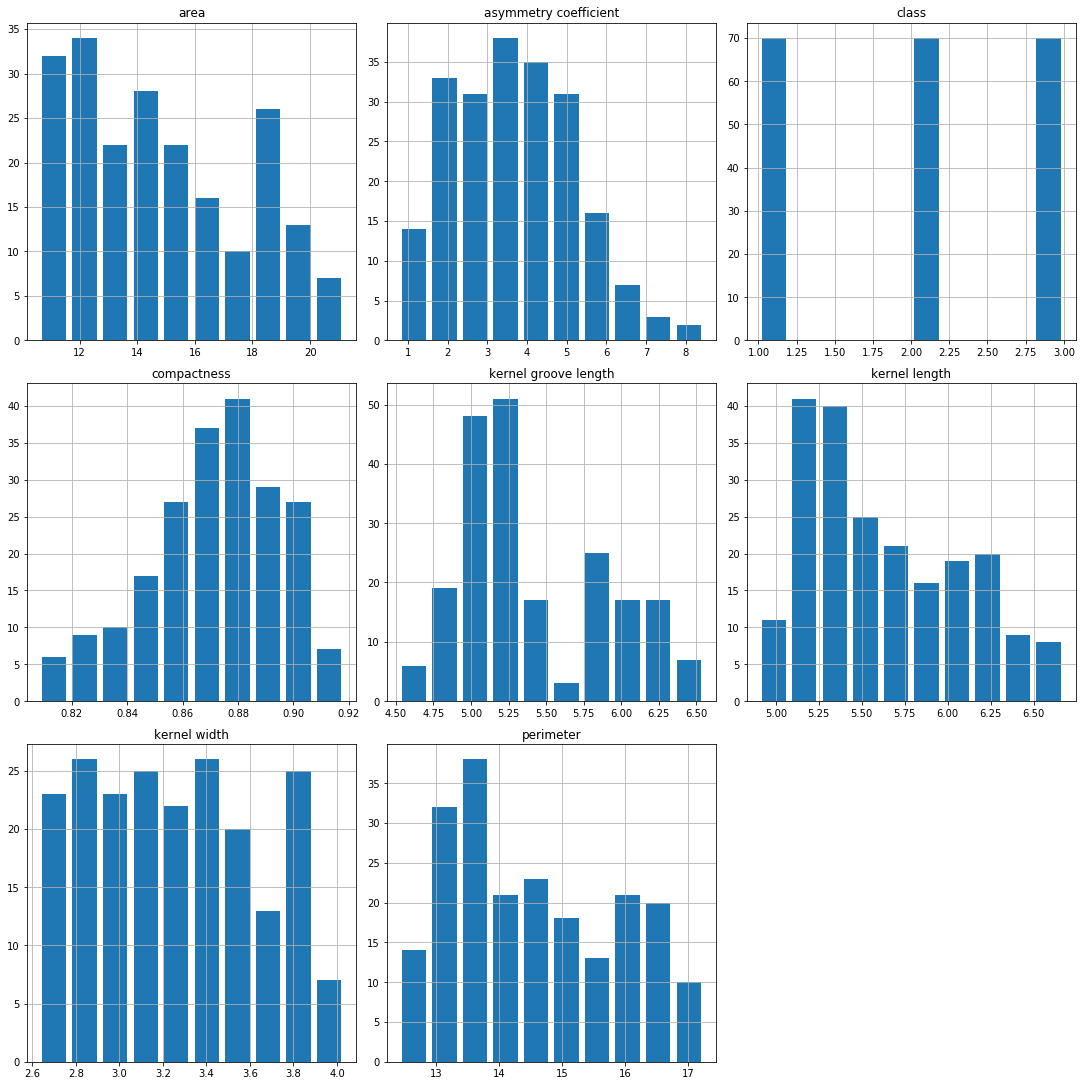

In [57]:
# histogram (getting a good sense of each variable data)
dataset.hist(rwidth = 0.8)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

# V: Looking at Multivariate Distributions



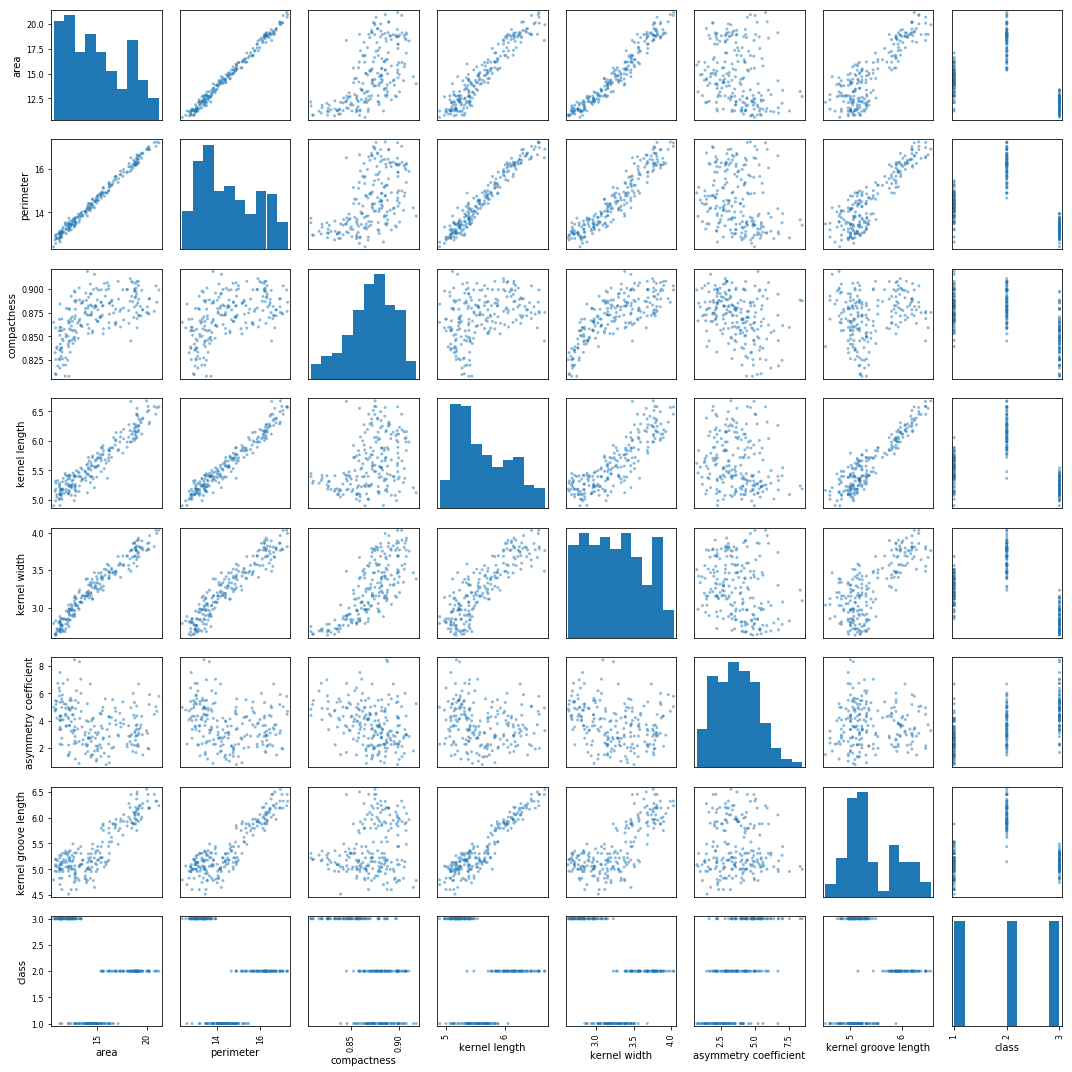

In [58]:
# scatter plot matrix (looking at relationships between variables) 
scatter_matrix(dataset)
plt.tight_layout()
plt.show()

Notice that there's diagonal grouping of some pairs. This is a great sign, and indicates that there is a positive correlation between attributes. This also indicates a linear relationship, and I can guess that linear classifying algorithms will be effective in modeling this data. I'll keep this in mind for later.

# VI: Split-out validation dataset


In [59]:
array = dataset.values
X = array[:,0:4]
X = X.astype('int')
Y = array[:,4]
Y = Y.astype('int')
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Test Harness

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
I'm keeping a random seed to ensure that each evaluation of the algorithm happens with the same data splits.

In [60]:
seed = 7
scoring = 'accuracy'

# VII: Building Models

I don't know which algorithms will be good for this problem, but from the results of Step V, I can tell that linear classifiers will probably be effective.

 - Among linear classifiers, I'm going to test
	- 'LR', LogisticRegression
	- 'KNN', KNeighborsClassifier
	- 'SVM', Support Vector Machines
    - 'CART', DecisionTreeClassifier



 - Among clustering algorithms, I'm going to test
     - 'KM', KMeans (I'm testing SciKit's MiniBatchKMeans because my sample size is large)

# VIII: Checking Classifier Algorithms

In [61]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('KM', MiniBatchKMeans()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [62]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	plt.show()

LR: 0.916544 (0.065809)
SVM: 0.916544 (0.065809)
KNN: 0.875368 (0.066430)
KM: 0.111765 (0.121837)
CART: 0.916544 (0.065809)
NB: 0.850735 (0.078838)


LR, SVM, and CART have the highest accuracy score.

# IX: Algorithmic Comparison

I'm going to make a box and whisker plot to compare the evaluation results of each model. This will also show the spread and average accuracy of each model. There are a total of 10 accuracy measures because each algorithm was evaluated 10 times in the test harness step.

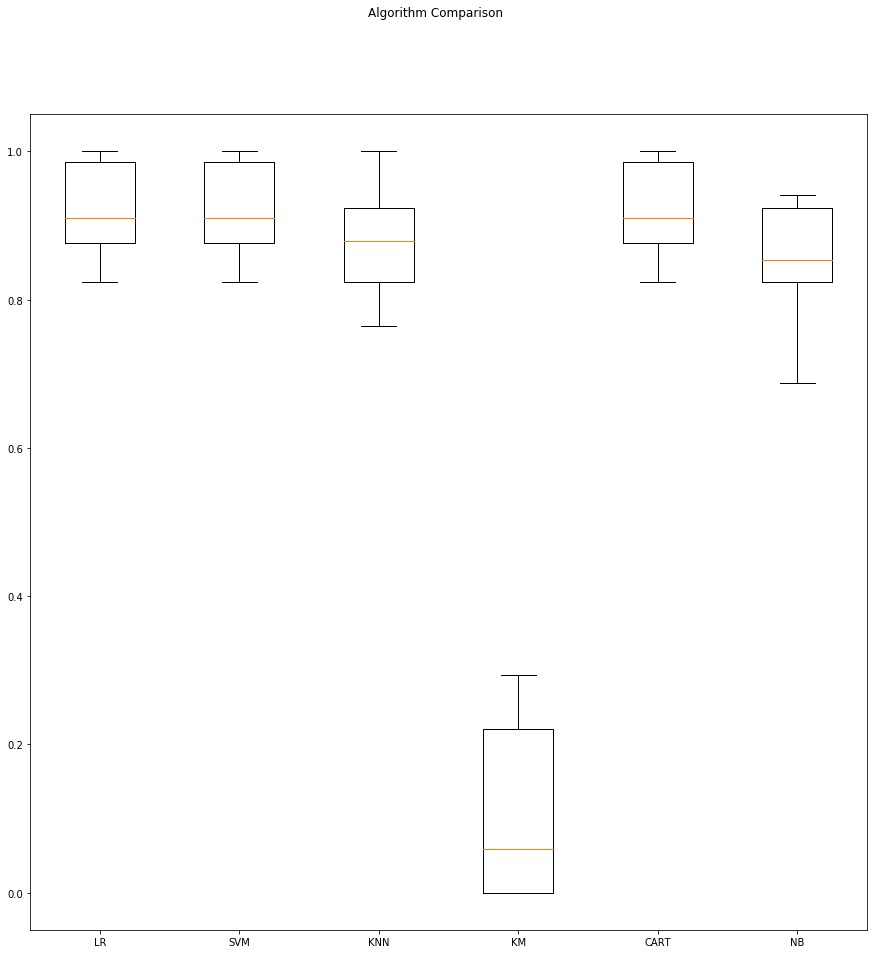

In [63]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# X: Making Predictions

We now know that LR, SVM, and CART have the highest predicted accuracy score on the training set. But what about the testing set? This will provide 1 more final independent check of the accuracy of the model.

In [65]:
# Make predictions on validation dataset (LR)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.952380952381
[[11  0]
 [ 2 29]]
             precision    recall  f1-score   support

          2       0.85      1.00      0.92        11
          3       1.00      0.94      0.97        31

avg / total       0.96      0.95      0.95        42



In [66]:
# Make predictions on validation dataset (SVM)
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.952380952381
[[11  0]
 [ 2 29]]
             precision    recall  f1-score   support

          2       0.85      1.00      0.92        11
          3       1.00      0.94      0.97        31

avg / total       0.96      0.95      0.95        42



In [67]:
# Make predictions on validation dataset (CART)
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.952380952381
[[11  0]
 [ 2 29]]
             precision    recall  f1-score   support

          2       0.85      1.00      0.92        11
          3       1.00      0.94      0.97        31

avg / total       0.96      0.95      0.95        42



We can see that accuracy is 95%. 